In [1]:
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.image as mpimg # mpimg 用于读取图片
from keras.preprocessing import image
%matplotlib inline

c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [25]:
#通过InceptionResNetV2 找到的异常图片列表
IR=['dog.9188.jpg', 'dog.1259.jpg', 'cat.7377.jpg', 'cat.8456.jpg', 'cat.2520.jpg', 'cat.2939.jpg', 
     'dog.1194.jpg', 'dog.12376.jpg', 'dog.4367.jpg', 'dog.10747.jpg', 'cat.4688.jpg', 'dog.6475.jpg', 
     'cat.11777.jpg', 'dog.8736.jpg', 'cat.7464.jpg', 'cat.6345.jpg', 'cat.3004.jpg', 'cat.10029.jpg', 
     'cat.10712.jpg', 'dog.2614.jpg', 'dog.10190.jpg', 'cat.4308.jpg', 'cat.5351.jpg', 'dog.1773.jpg', 
     'dog.10237.jpg', 'cat.8470.jpg', 'cat.4338.jpg', 'cat.5071.jpg', 'cat.3672.jpg', 'dog.10801.jpg', 
     'dog.6725.jpg', 'cat.9171.jpg', 'dog.11266.jpg', 'dog.9517.jpg', 'cat.7564.jpg', 'cat.7968.jpg', 
     'cat.12424.jpg', 'dog.11299.jpg', 'dog.10161.jpg', 'dog.2422.jpg', 'dog.1895.jpg', 'dog.5604.jpg']

In [26]:
#通过InceptionV3 找到的异常图片列表
I3=['dog.1259.jpg', 'cat.8456.jpg', 'dog.8898.jpg', 'dog.1194.jpg', 'dog.12376.jpg', 'dog.4367.jpg', 
     'cat.5418.jpg', 'dog.10747.jpg', 'cat.2337.jpg', 'dog.6475.jpg', 'cat.11777.jpg', 'dog.8736.jpg', 
     'cat.10029.jpg', 'cat.10712.jpg', 'dog.2614.jpg', 'dog.10190.jpg', 'cat.5351.jpg', 'dog.1773.jpg',
     'dog.10237.jpg', 'cat.4338.jpg', 'dog.10801.jpg', 'cat.9171.jpg', 'dog.9517.jpg', 'cat.7564.jpg', 
     'cat.8921.jpg', 'cat.10365.jpg', 'cat.7968.jpg', 'cat.3216.jpg', 'dog.10161.jpg', 'dog.2422.jpg', 
     'cat.2433.jpg', 'cat.11184.jpg', 'dog.1895.jpg', 'dog.5604.jpg']


In [27]:
#通过Xception 找到的异常图片列表
X=['dog.9188.jpg','dog.1259.jpg','cat.7377.jpg','cat.8456.jpg','cat.2939.jpg','dog.8898.jpg',
'dog.12376.jpg','dog.4367.jpg','cat.5418.jpg','cat.10636.jpg','cat.12476.jpg','cat.4688.jpg',
'dog.6475.jpg','dog.8736.jpg','cat.10029.jpg','cat.10712.jpg','dog.2614.jpg','dog.10190.jpg',
'cat.5351.jpg','dog.1773.jpg','dog.10237.jpg','cat.8470.jpg','cat.4338.jpg','cat.5071.jpg',
'cat.3672.jpg','dog.10801.jpg','dog.6725.jpg','cat.9171.jpg','dog.9517.jpg','cat.7564.jpg',
'cat.7968.jpg','cat.12424.jpg','cat.3216.jpg','dog.11299.jpg','dog.10161.jpg','dog.3889.jpg',
'cat.11184.jpg','dog.1895.jpg','dog.5604.jpg']

In [41]:
l=Counter(IR+I3+X) #合并列表，获得每张图片在三个模型中出现的频数
ll=sorted(zip(l.values(),l.keys()))
print(ll)

[(1, 'cat.10365.jpg'), (1, 'cat.10636.jpg'), (1, 'cat.12476.jpg'), (1, 'cat.2337.jpg'), (1, 'cat.2433.jpg'), (1, 'cat.2520.jpg'), (1, 'cat.3004.jpg'), (1, 'cat.4308.jpg'), (1, 'cat.6345.jpg'), (1, 'cat.7464.jpg'), (1, 'cat.8921.jpg'), (1, 'dog.11266.jpg'), (1, 'dog.3889.jpg'), (2, 'cat.11184.jpg'), (2, 'cat.11777.jpg'), (2, 'cat.12424.jpg'), (2, 'cat.2939.jpg'), (2, 'cat.3216.jpg'), (2, 'cat.3672.jpg'), (2, 'cat.4688.jpg'), (2, 'cat.5071.jpg'), (2, 'cat.5418.jpg'), (2, 'cat.7377.jpg'), (2, 'cat.8470.jpg'), (2, 'dog.10747.jpg'), (2, 'dog.11299.jpg'), (2, 'dog.1194.jpg'), (2, 'dog.2422.jpg'), (2, 'dog.6725.jpg'), (2, 'dog.8898.jpg'), (2, 'dog.9188.jpg'), (3, 'cat.10029.jpg'), (3, 'cat.10712.jpg'), (3, 'cat.4338.jpg'), (3, 'cat.5351.jpg'), (3, 'cat.7564.jpg'), (3, 'cat.7968.jpg'), (3, 'cat.8456.jpg'), (3, 'cat.9171.jpg'), (3, 'dog.10161.jpg'), (3, 'dog.10190.jpg'), (3, 'dog.10237.jpg'), (3, 'dog.10801.jpg'), (3, 'dog.12376.jpg'), (3, 'dog.1259.jpg'), (3, 'dog.1773.jpg'), (3, 'dog.1895.jpg

三个模型预测识别下非猫非狗频数为1的图片一共有13张
三个模型预测识别下非猫非狗的图片一共有如下53张：


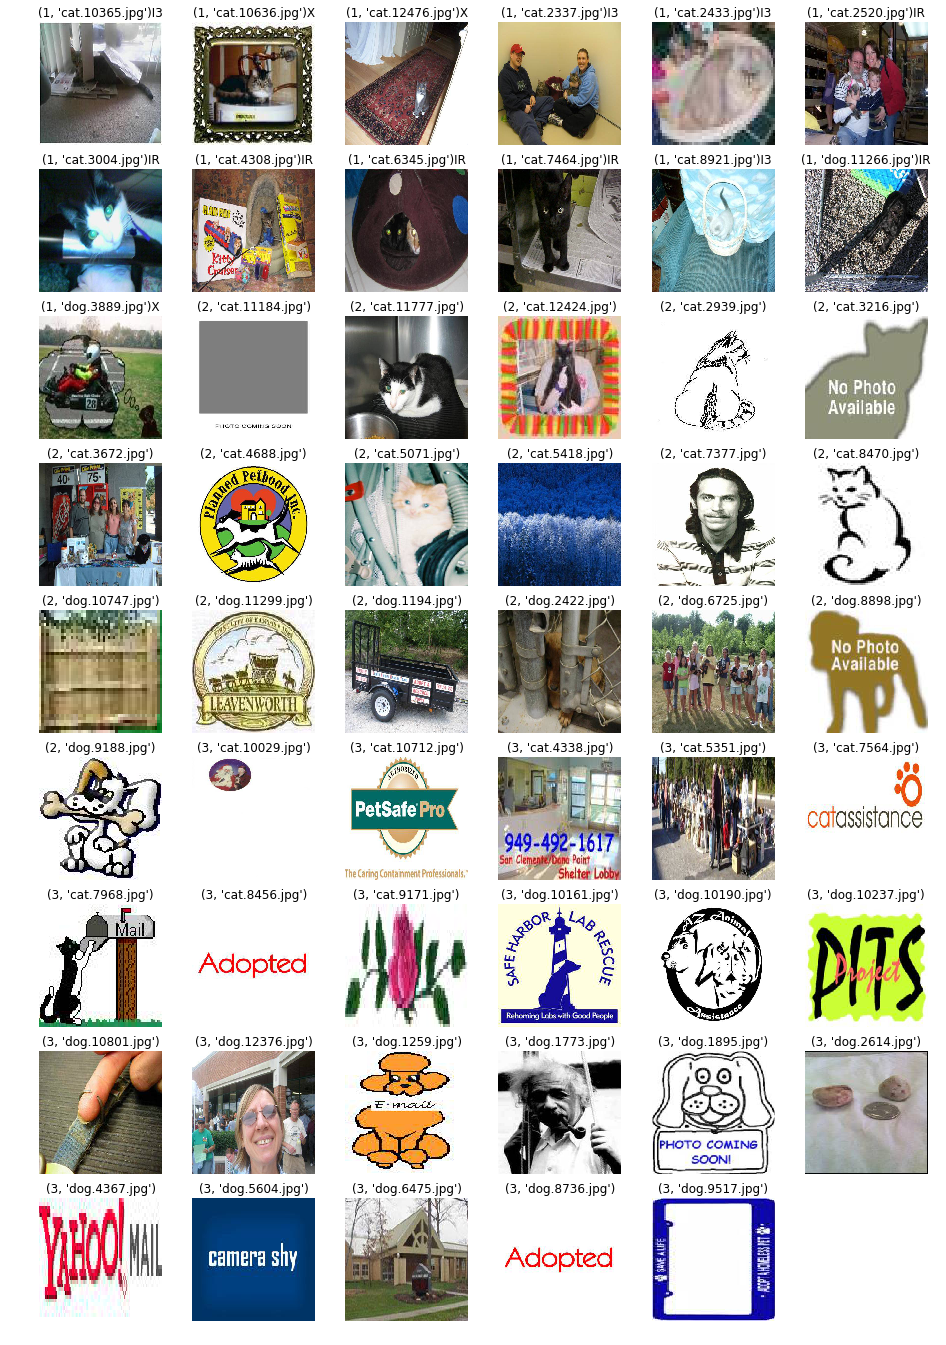

In [34]:
plt.figure(figsize=(16,32))
exi=[] #三个模型预测识别下非猫非狗的频数为1的图片列表
exo=[] #三个模型预测识别下非猫非狗的所有图片列表
for i,imgn in enumerate(ll):
    img='D:\CD\\train\\'+imgn[1]
    im=image.load_img(img,target_size=(1000,1000))
    plt.subplot(12,6,i+1)
    exo.append(imgn[1])
    if imgn[0]==1:# 显示频数为1的识别模型来源
        exi.append(imgn[1])
        if imgn[1] in I3:
            plt.title(str(imgn)+'I3')
        elif imgn[1] in X:
            plt.title(str(imgn)+'X')
        else:
            plt.title(str(imgn)+'IR')
    else:
        plt.title(str(imgn))
    plt.axis("off")
    plt.imshow(im, interpolation="nearest")
len1=len(exi)
print('三个模型预测识别下非猫非狗频数为1的图片一共有'+str(len1)+'张')
len2=len(exo)
print('三个模型预测识别下非猫非狗的图片一共有如下'+str(len2)+'张：')

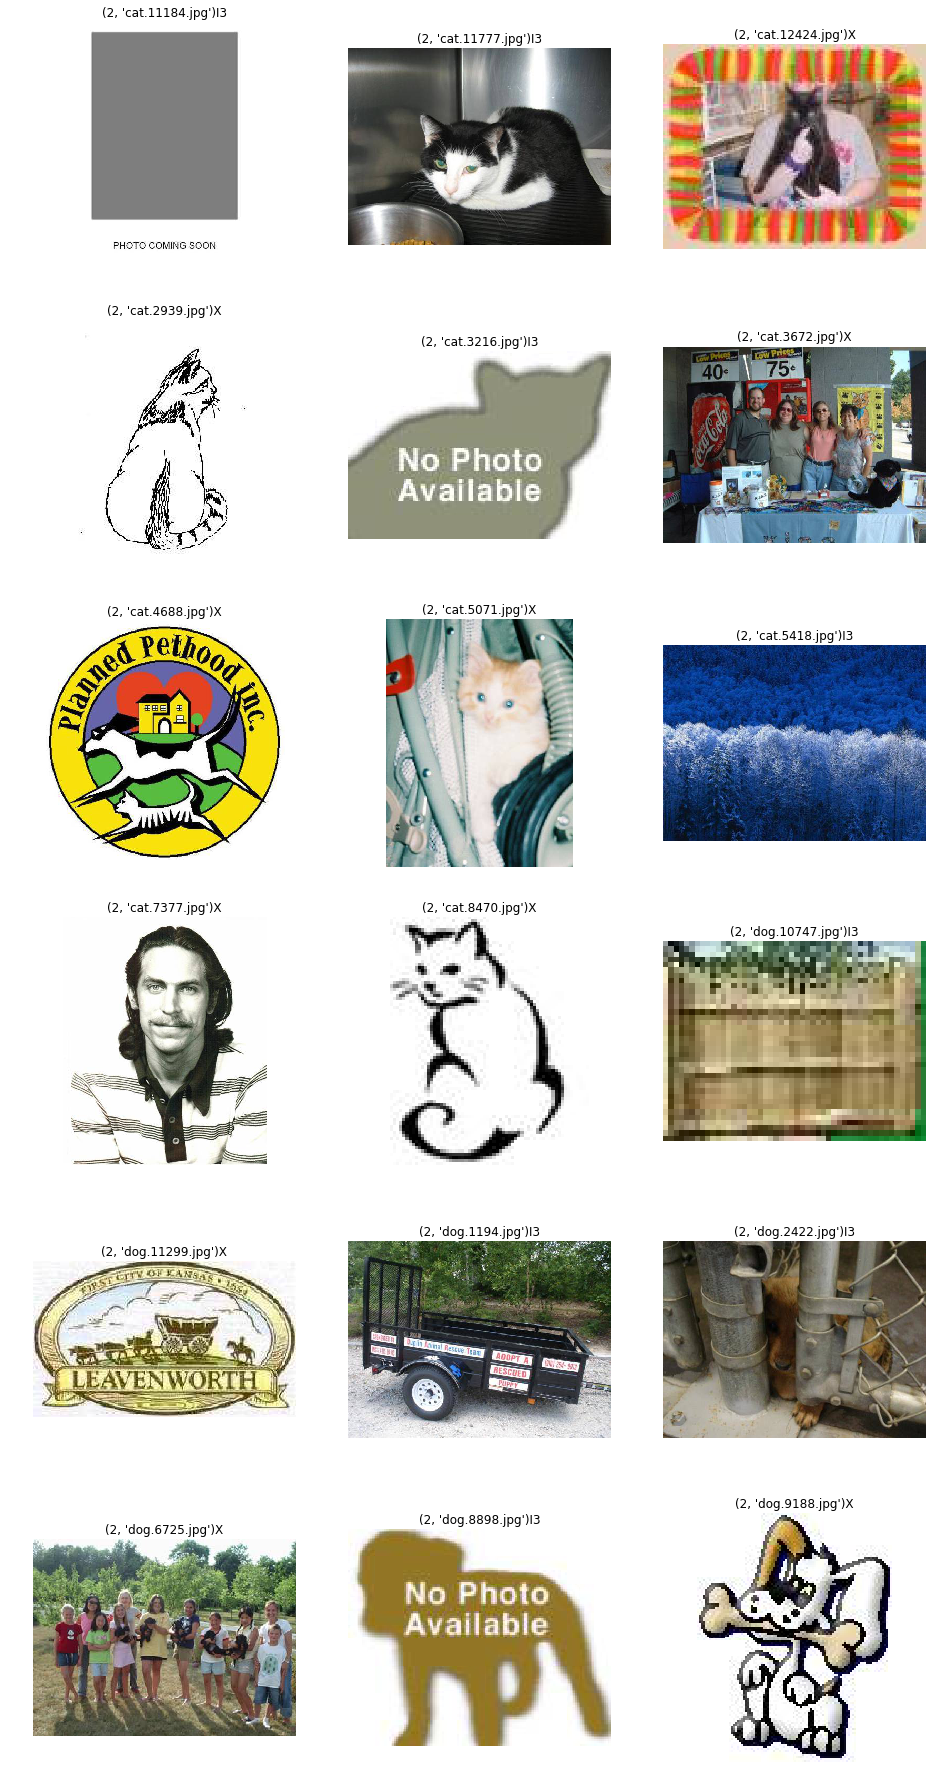

In [38]:
plt.figure(figsize=(16,32))#单独放大来看频数为2的图片
t=0
for i,imgn in enumerate(ll):   
    if imgn[0]==2:
        t+=1
        img='D:\CD\\train\\'+imgn[1]
        im = mpimg.imread(img)
        plt.subplot(6,3,t)
        if imgn[1] in I3:
            plt.title(str(imgn)+'I3')
        elif imgn[1] in X:
            plt.title(str(imgn)+'X')
        else:
            plt.title(str(imgn)+'IR')
        plt.axis("off")
        plt.imshow(im, interpolation="nearest")
plt.show()
# 可以看到部分图片是可以用来训练模型的，选择保留

经过人工排除 17 张图片:


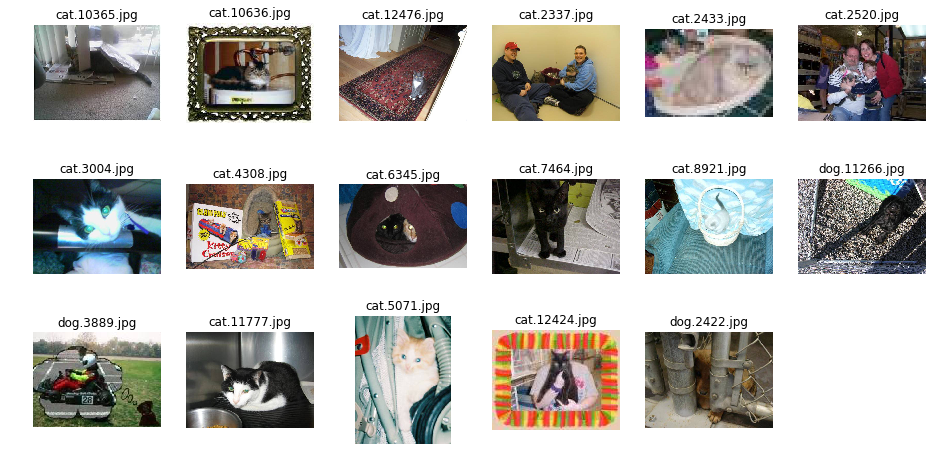

最终删掉 36 张图片:


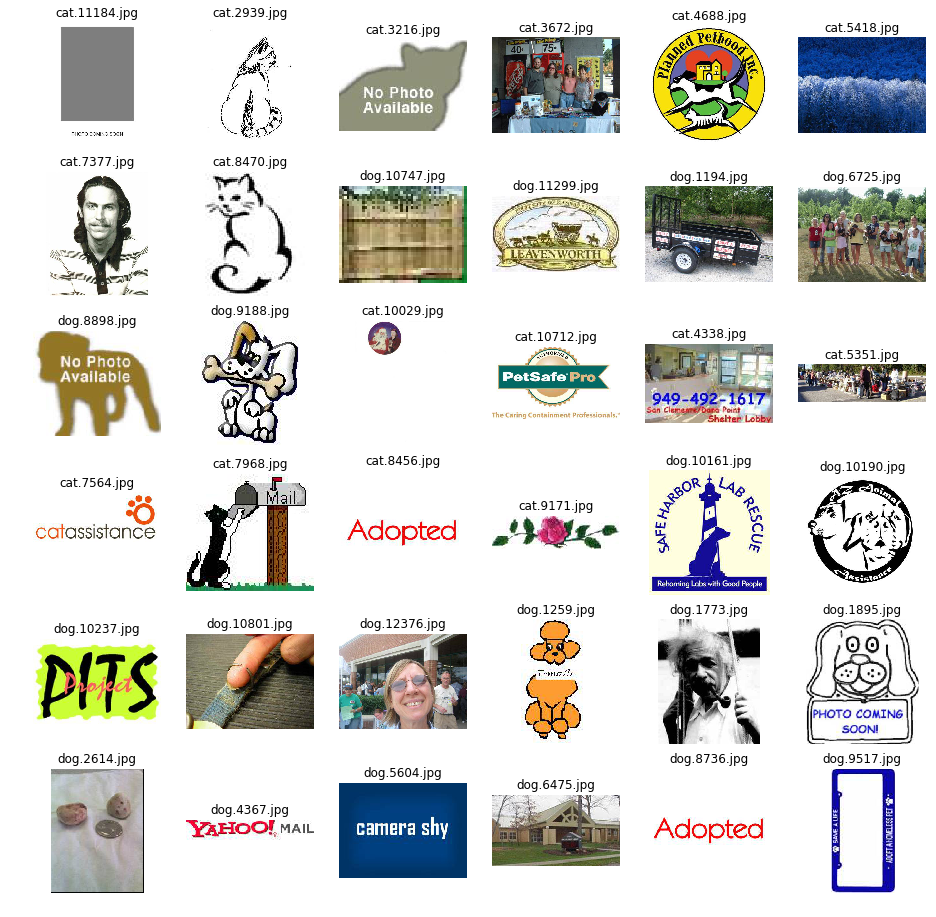

In [40]:
exi2=exi+['cat.11777.jpg','cat.5071.jpg','cat.12424.jpg','dog.2422.jpg']
#最终保留全部频数为1的图片和部分频数为2的图片
ex=[x for x in exo if x not in exi2]
#
print('经过人工排除',str(len(exi2)),'张图片:')
plt.figure(figsize=(16,8))
for i,imgn in enumerate(exi2):   
             img='D:\CD\\train\\'+imgn
             im = mpimg.imread(img)
             plt.subplot(3,6,i+1)
             plt.title(imgn)
             plt.axis("off")
             plt.imshow(im, interpolation="nearest")
plt.show()
print('最终删掉',str(len(ex)),'张图片:')
plt.figure(figsize=(16,16))
for i,imgn in enumerate(ex):   
             img='D:\CD\\train\\'+imgn
             im = mpimg.imread(img)
             plt.subplot(6,6,i+1)
             plt.title(imgn)
             plt.axis("off")
             plt.imshow(im, interpolation="nearest")
#最终需要删掉的图片列表
exfile=open('delete.txt','w')
exfile.write(str(ex))
exfile.close()